In [70]:
gabert_path = '/content/final_gaBERT_for_eval_V1.conll'
gabert_crf_path = '/content/final_gaBERT_V2_5_BiLSTM_eval.conll'

In [71]:
def read_conll_file(file_path):
    data = []
    current_sentence = []
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            line = line.strip()
            if line.startswith('-DOCSTART-'):
                continue
            if line:
                parts = line.split()
                word = parts[0]
                gold_label = parts[-2]
                pred_label = parts[-1]
                current_sentence.append((word, gold_label, pred_label))
            else:
                if current_sentence:
                    data.append(current_sentence)
                    current_sentence = []
    if current_sentence:
        data.append(current_sentence)
    return data

In [72]:
gabert = read_conll_file(gabert_path)
print(gabert)

[[('Mar', 'O', 'O'), ('a', 'O', 'O'), ('t', 'O', 'O'), ('##ch', 'O', 'O'), ('##ítear', 'O', 'O'), ('do', 'O', 'O'), ('Sheos', 'B-PER', 'B-PER'), ('##amh', 'B-PER', 'B-PER'), ('Mac', 'I-PER', 'I-PER'), ('Grianna', 'I-PER', 'I-PER'), ('é', 'O', 'O'), ('caithfidh', 'O', 'O'), ('an', 'O', 'O'), ('t', 'O', 'O'), ('-', 'O', 'O'), ('ealaíontóir', 'O', 'O'), ('an', 'O', 'O'), ('solas', 'O', 'O'), ('a', 'O', 'O'), ('thabhairt', 'O', 'O'), ('don', 'O', 'O'), ('saol', 'O', 'O'), ('agus', 'O', 'O'), ('diúltú', 'O', 'O'), ('do', 'O', 'O'), ('chath', 'O', 'O'), ('##ú', 'O', 'O'), ('sin', 'O', 'O'), ('na', 'O', 'O'), ('truaill', 'O', 'O'), ('##íochta', 'O', 'O'), ('a', 'O', 'O'), ('chuireann', 'O', 'O'), ('an', 'O', 'O'), ('saol', 'O', 'O'), ('ina', 'O', 'O'), ('chos', 'O', 'O'), ('##án', 'O', 'O'), ('.', 'O', 'O')], [('Dhiúltaigh', 'O', 'O'), ('John', 'B-PER', 'B-PER'), ('##atha', 'B-PER', 'B-PER'), ('##n', 'B-PER', 'B-PER'), ('Cape', 'I-PER', 'I-PER'), ('agus', 'O', 'O'), ('cúpla', 'O', 'O'), ('foi

In [73]:
print(len(gabert))

140


In [74]:
incorrect_gabert = {}
correct_gabert = {}
i = 0
while i < len(gabert):
  sentence = gabert[i]
  incorrects = []
  corrects = []
  for tup in sentence:
    word, gold, pred = tup
    if gold != pred:
      incorrects.append((tup))
    else:
      corrects.append((tup))
  incorrect_gabert[i] = incorrects
  correct_gabert[i] = corrects
  i += 1

incorrect_gabert = {k: v for k, v in incorrect_gabert.items() if v}
print(incorrect_gabert)
correct_gabert = {k: v for k, v in correct_gabert.items() if v}
print(correct_gabert)

{4: [('Páistí', 'B-ORG', 'O'), ('Na', 'I-ORG', 'B-ORG'), ('##ís', 'I-ORG', 'B-ORG'), ('##co', 'I-ORG', 'B-ORG'), ('an', 'I-ORG', 'O')], 5: [('Mhara', 'O', 'B-PER'), ('##sca', 'O', 'B-PER'), ('##l', 'O', 'B-PER'), ('Machaire', 'O', 'I-PER')], 7: [('Bean', 'O', 'B-PER'), ('Uí', 'B-PER', 'I-PER')], 8: [('##gate', 'B-ORG', 'B-LOC')], 9: [('Lig', 'O', 'B-ORG')], 13: [('Rose', 'B-PER', 'B-ORG'), ('of', 'I-PER', 'I-ORG'), ('Moon', 'I-PER', 'I-ORG'), ('##coin', 'I-PER', 'I-ORG')], 17: [('Qu', 'B-LOC', 'B-ORG'), ('##art', 'B-LOC', 'B-ORG'), ('##ier', 'B-LOC', 'B-ORG'), ('Lat', 'I-LOC', 'I-PER'), ('##in', 'I-LOC', 'I-PER'), ('Phá', 'I-LOC', 'I-ORG'), ('##rais', 'I-LOC', 'I-ORG')], 18: [('Páirtí', 'I-ORG', 'B-ORG')], 19: [('Cearta', 'B-ORG', 'O'), ('daonna', 'I-ORG', 'O'), ('Bunú', 'I-ORG', 'O'), ('comhlachtaí', 'I-ORG', 'O'), ('deonacha', 'I-ORG', 'O'), ('Cúiteamh', 'I-ORG', 'O'), ('timpiste', 'I-ORG', 'O'), ('Comhairle', 'I-ORG', 'O'), ('do', 'I-ORG', 'O'), ('scoileanna', 'I-ORG', 'O'), ('Gaeil

In [75]:
gabert_crf = read_conll_file(gabert_crf_path)

In [76]:
incorrect_gabert_crf = {}
correct_gabert_crf = {}
i = 0
while i < len(gabert_crf):
  sentence = gabert_crf[i]
  incorrects = []
  corrects = []
  for tup in sentence:
    word, gold, pred = tup
    if gold != pred:
      incorrects.append((tup))
    else:
      corrects.append((tup))
  incorrect_gabert_crf[i] = incorrects
  correct_gabert_crf[i] = corrects
  i += 1

incorrect_gabert_crf = {k: v for k, v in incorrect_gabert_crf.items() if v}
print(incorrect_gabert_crf)
correct_gabert_crf = {k: v for k, v in correct_gabert_crf.items() if v}
print(correct_gabert_crf)

{4: [('Páistí', 'B-ORG', 'O'), ('Na', 'I-ORG', 'B-ORG'), ('##ís', 'I-ORG', 'B-ORG'), ('##co', 'I-ORG', 'B-ORG')], 5: [('Ard', 'O', 'B-PER'), ('-', 'O', 'B-PER'), ('Cheannasaí', 'O', 'B-PER'), ('Mhara', 'O', 'B-PER'), ('##sca', 'O', 'B-PER'), ('##l', 'O', 'B-PER'), ('Machaire', 'O', 'I-PER')], 7: [('Bean', 'O', 'B-PER'), ('Uí', 'B-PER', 'I-PER')], 13: [('Moon', 'I-PER', 'I-ORG'), ('##coin', 'I-PER', 'I-ORG')], 17: [('Qu', 'B-LOC', 'B-ORG'), ('##art', 'B-LOC', 'B-ORG'), ('##ier', 'B-LOC', 'B-ORG'), ('Lat', 'I-LOC', 'I-ORG'), ('##in', 'I-LOC', 'I-ORG'), ('Phá', 'I-LOC', 'I-ORG'), ('##rais', 'I-LOC', 'I-ORG')], 19: [('Cearta', 'B-ORG', 'O'), ('daonna', 'I-ORG', 'O'), ('Bunú', 'I-ORG', 'O'), ('comhlachtaí', 'I-ORG', 'O'), ('deonacha', 'I-ORG', 'O'), ('Cúiteamh', 'I-ORG', 'O'), ('timpiste', 'I-ORG', 'O'), ('Comhairle', 'I-ORG', 'O'), ('do', 'I-ORG', 'O'), ('scoileanna', 'I-ORG', 'O'), ('Gaeilge', 'I-ORG', 'O'), ('Co', 'I-LOC', 'B-LOC'), ('.', 'I-LOC', 'B-LOC')], 20: [('gCoimisiún', 'O', 'B-O

In [77]:
print(len(incorrect_gabert.values()))

69


In [78]:
print(len(incorrect_gabert_crf.values()))

63


In [79]:
common_pairs = {key: value for key, value in incorrect_gabert.items() if key in incorrect_gabert_crf and incorrect_gabert_crf[key] == value}

print(common_pairs)

{7: [('Bean', 'O', 'B-PER'), ('Uí', 'B-PER', 'I-PER')], 20: [('gCoimisiún', 'O', 'B-ORG'), ('Choimisiún', 'O', 'B-ORG')], 23: [('Tiobraid', 'B-ORG', 'B-LOC'), ('Árann', 'I-ORG', 'I-LOC'), ('Luimneach', 'B-ORG', 'B-LOC'), ('Chorcaí', 'B-ORG', 'B-LOC'), ('Phort', 'B-ORG', 'B-LOC'), ('Láirge', 'I-ORG', 'I-LOC')], 25: [('Bhinse', 'O', 'B-ORG'), ('Fios', 'O', 'I-ORG'), ('##raithe', 'O', 'I-ORG')], 26: [('Diarmaid', 'I-PER', 'B-PER')], 33: [('tAire', 'B-PER', 'O'), ('Sláinte', 'I-PER', 'O'), ('Bair', 'I-PER', 'B-PER'), ('##bre', 'I-PER', 'B-PER'), ('SEIF', 'B-ORG', 'O')], 43: [('Sap', 'B-PER', 'B-ORG'), ('##a', 'B-PER', 'B-ORG'), ('Inc', 'I-PER', 'I-ORG'), ('##a', 'I-PER', 'I-ORG')], 46: [('Chap', 'O', 'B-PER'), ('##aillí', 'O', 'B-PER'), ('##n', 'O', 'B-PER')], 54: [('Bealach', 'O', 'B-LOC'), ('a', 'O', 'I-LOC'), ("'", 'O', 'I-LOC'), ('Cho', 'O', 'I-LOC'), ('##in', 'O', 'I-LOC'), ('Ghla', 'O', 'I-LOC'), ('##is', 'O', 'I-LOC')], 64: [('Aire', 'O', 'B-PER')], 77: [('Gaeltachta', 'B-LOC', 'O')

In [80]:
common_correct = {key: value for key, value in correct_gabert.items() if key in correct_gabert_crf and correct_gabert_crf[key] == value}
print(common_correct)

{0: [('Mar', 'O', 'O'), ('a', 'O', 'O'), ('t', 'O', 'O'), ('##ch', 'O', 'O'), ('##ítear', 'O', 'O'), ('do', 'O', 'O'), ('Sheos', 'B-PER', 'B-PER'), ('##amh', 'B-PER', 'B-PER'), ('Mac', 'I-PER', 'I-PER'), ('Grianna', 'I-PER', 'I-PER'), ('é', 'O', 'O'), ('caithfidh', 'O', 'O'), ('an', 'O', 'O'), ('t', 'O', 'O'), ('-', 'O', 'O'), ('ealaíontóir', 'O', 'O'), ('an', 'O', 'O'), ('solas', 'O', 'O'), ('a', 'O', 'O'), ('thabhairt', 'O', 'O'), ('don', 'O', 'O'), ('saol', 'O', 'O'), ('agus', 'O', 'O'), ('diúltú', 'O', 'O'), ('do', 'O', 'O'), ('chath', 'O', 'O'), ('##ú', 'O', 'O'), ('sin', 'O', 'O'), ('na', 'O', 'O'), ('truaill', 'O', 'O'), ('##íochta', 'O', 'O'), ('a', 'O', 'O'), ('chuireann', 'O', 'O'), ('an', 'O', 'O'), ('saol', 'O', 'O'), ('ina', 'O', 'O'), ('chos', 'O', 'O'), ('##án', 'O', 'O'), ('.', 'O', 'O')], 1: [('Dhiúltaigh', 'O', 'O'), ('John', 'B-PER', 'B-PER'), ('##atha', 'B-PER', 'B-PER'), ('##n', 'B-PER', 'B-PER'), ('Cape', 'I-PER', 'I-PER'), ('agus', 'O', 'O'), ('cúpla', 'O', 'O'),

In [81]:
only_gabert = {key: value for key, value in incorrect_gabert.items() if key not in incorrect_gabert_crf}

print(only_gabert)

{8: [('##gate', 'B-ORG', 'B-LOC')], 9: [('Lig', 'O', 'B-ORG')], 18: [('Páirtí', 'I-ORG', 'B-ORG')], 24: [('Phádraig', 'B-PER', 'I-PER')], 29: [('##an', 'B-PER', 'O')], 30: [('Un', 'B-ORG', 'B-PER'), ('##ison', 'B-ORG', 'B-PER')], 38: [('s', 'I-LOC', 'O')], 65: [('##oh', 'B-PER', 'I-PER'), ('##oe', 'B-PER', 'I-PER')], 75: [('hÉireann', 'B-LOC', 'O')], 85: [('Éire', 'B-LOC', 'B-ORG'), ('Rúis', 'B-LOC', 'B-ORG')], 109: [('Bar', 'B-ORG', 'B-PER')], 111: [('lear', 'O', 'B-LOC')], 136: [('Local', 'B-ORG', 'O'), ('Link', 'I-ORG', 'O')]}


In [82]:
only_gabert_crf = {key: value for key, value in incorrect_gabert_crf.items() if key not in incorrect_gabert}

print(only_gabert_crf)

{37: [('##mann', 'O', 'B-LOC')], 52: [('Gaeltachta', 'O', 'B-LOC')], 53: [('Ceannaire', 'O', 'B-PER')], 87: [('Rialtas', 'B-ORG', 'O')], 99: [('tOmbudsman', 'B-ORG', 'B-PER')], 104: [('FE', 'B-ORG', 'O'), ('##T', 'B-ORG', 'O')], 121: [('-', 'O', 'B-LOC'), ('Teorann', 'O', 'B-LOC')]}


In [83]:
print(len(only_gabert.values()))
print(len(only_gabert_crf.values()))

13
7


In [84]:
# PER
per_incorrect_index =  {}
for k, v in only_gabert.items():
  for vals in v:
    word, gold, pred = vals
    if 'PER' in gold:
      per_incorrect_index[k] = [vals[0] for vals in v if 'PER' in vals[1]]
      print(k, word)

24 Phádraig
29 ##an
65 ##oh
65 ##oe


In [85]:
print(per_incorrect_index)

{24: ['Phádraig'], 29: ['##an'], 65: ['##oh', '##oe']}


In [86]:
for keys, values in per_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-2:i+2])
        i += 1
      else:
        i += 1


[]
[('(', 'O', 'O'), ('Log', 'B-PER', 'B-PER'), ('##an', 'B-PER', 'O'), (',', 'O', 'O')]
[('Teachta', 'O', 'O'), ('Don', 'B-PER', 'B-PER'), ('##oh', 'B-PER', 'I-PER'), ('##oe', 'B-PER', 'I-PER')]
[('Don', 'B-PER', 'B-PER'), ('##oh', 'B-PER', 'I-PER'), ('##oe', 'B-PER', 'I-PER'), (',', 'O', 'O')]


In [87]:
# PER
per_incorrect_index =  {}
for k, v in only_gabert_crf.items():
  for vals in v:
    word, gold, pred = vals
    if 'PER' in gold:
      per_incorrect_index[k] = [vals[0] for vals in v if 'PER' in vals[1]]
      print(k, word)

for keys, values in per_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-2:i+2])
        i += 1
      else:
        i += 1

In [88]:
# PER
per_incorrect_index =  {}
for k, v in common_pairs.items():
  for vals in v:
    word, gold, pred = vals
    if 'PER' in gold:
      per_incorrect_index[k] = [vals[0] for vals in v if 'PER' in vals[1]]
      print(k, word)

for keys, values in per_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    j = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-2:i+2])
        i += 1
      else:
        i += 1

for keys, values in per_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    j = 0
    sentence = gabert[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-2:i+2])
        i += 1
      else:
        i += 1

7 Uí
26 Diarmaid
33 tAire
33 Sláinte
33 Bair
33 ##bre
43 Sap
43 ##a
43 Inc
43 ##a
[(',', 'O', 'O'), ('Bean', 'O', 'B-PER'), ('Uí', 'B-PER', 'I-PER'), ('E', 'I-PER', 'I-PER')]
[('chumas', 'O', 'O'), ('Fhinn', 'B-PER', 'B-PER'), ('Diarmaid', 'I-PER', 'B-PER'), ('a', 'O', 'O')]
[('chuaigh', 'O', 'O'), ('an', 'O', 'O'), ('tAire', 'B-PER', 'O'), ('Sláinte', 'I-PER', 'O')]
[('an', 'O', 'O'), ('tAire', 'B-PER', 'O'), ('Sláinte', 'I-PER', 'O'), ('Bair', 'I-PER', 'B-PER')]
[('tAire', 'B-PER', 'O'), ('Sláinte', 'I-PER', 'O'), ('Bair', 'I-PER', 'B-PER'), ('##bre', 'I-PER', 'B-PER')]
[('Sláinte', 'I-PER', 'O'), ('Bair', 'I-PER', 'B-PER'), ('##bre', 'I-PER', 'B-PER'), ('de', 'I-PER', 'I-PER')]
[('ar', 'O', 'O'), ('an', 'O', 'O'), ('Sap', 'B-PER', 'B-ORG'), ('##a', 'B-PER', 'B-ORG')]
[('an', 'O', 'O'), ('Sap', 'B-PER', 'B-ORG'), ('##a', 'B-PER', 'B-ORG'), ('Inc', 'I-PER', 'I-ORG')]
[('##a', 'B-PER', 'B-ORG'), ('Inc', 'I-PER', 'I-ORG'), ('##a', 'I-PER', 'I-ORG'), ('agus', 'O', 'O')]
[('Sap', 'B-PER',

In [89]:
# ORG

org_incorrect_index =  {}
for k, v in only_gabert.items():
  for vals in v:
    word, gold, pred = vals
    if 'ORG' in gold:
      org_incorrect_index[k] = [vals[0] for vals in v if 'ORG' in vals[1]]
      print(k, word)

for keys, values in org_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-2:i+2])
        i += 1
      else:
        i += 1

8 ##gate
18 Páirtí
30 Un
30 ##ison
109 Bar
136 Local
136 Link
[('##sh', 'B-ORG', 'B-ORG'), ('##ops', 'B-ORG', 'B-ORG'), ('##gate', 'B-ORG', 'B-LOC'), ('Institute', 'I-ORG', 'I-ORG')]
[('bheidh', 'O', 'O'), ('An', 'B-ORG', 'B-ORG'), ('Páirtí', 'I-ORG', 'B-ORG'), ('Glas', 'I-ORG', 'I-ORG')]
[('déanta', 'O', 'O'), ('ag', 'O', 'O'), ('Un', 'B-ORG', 'B-PER'), ('##ison', 'B-ORG', 'B-PER')]
[('ag', 'O', 'O'), ('Un', 'B-ORG', 'B-PER'), ('##ison', 'B-ORG', 'B-PER'), (',', 'O', 'O')]
[('a', 'O', 'O'), ('rinne', 'O', 'O'), ('Bar', 'B-ORG', 'B-PER'), ('##nard', 'B-ORG', 'B-ORG')]
[('##éise', 'I-LOC', 'I-LOC'), ('sa', 'O', 'O'), ('Local', 'B-ORG', 'O'), ('Link', 'I-ORG', 'O')]
[('sa', 'O', 'O'), ('Local', 'B-ORG', 'O'), ('Link', 'I-ORG', 'O'), ('atá', 'O', 'O')]


In [90]:
# LOC

loc_incorrect_index =  {}
for k, v in only_gabert.items():
  for vals in v:
    word, gold, pred = vals
    if 'LOC' in gold:
      loc_incorrect_index[k] = [vals[0] for vals in v if 'LOC' in vals[1]]
      print(k, word)

for keys, values in loc_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(gabert[keys])
        i += 1
      else:
        i += 1

38 s
75 hÉireann
85 Éire
85 Rúis
[('Bhí', 'O', 'O'), ('Éamonn', 'B-PER', 'B-PER'), ('ag', 'O', 'O'), ('obair', 'O', 'O'), ('go', 'O', 'O'), ('lána', 'O', 'O'), ('##ims', 'O', 'O'), ('##ireach', 'O', 'O'), ('i', 'O', 'O'), ('gCol', 'B-LOC', 'B-LOC'), ('##l', 'B-LOC', 'B-LOC'), ('##cho', 'B-LOC', 'B-LOC'), ('##ill', 'B-LOC', 'B-LOC'), ('idir', 'O', 'O'), ('1928', 'O', 'O'), ('agus', 'O', 'O'), ('1936', 'O', 'O'), ('agus', 'O', 'O'), ('d', 'O', 'O'), ("'", 'O', 'O'), ('éirigh', 'O', 'O'), ('chomh', 'O', 'O'), ('maith', 'O', 'O'), ('sin', 'O', 'O'), ('leo', 'O', 'O'), ('go', 'O', 'O'), ('raibh', 'O', 'O'), ('an', 'O', 'O'), ('phl', 'O', 'O'), ('##and', 'O', 'O'), ('##lann', 'O', 'O'), ('i', 'O', 'O'), ('gCol', 'B-LOC', 'B-LOC'), ('##l', 'B-LOC', 'B-LOC'), ('##cho', 'B-LOC', 'B-LOC'), ('##ill', 'B-LOC', 'B-LOC'), ('ar', 'O', 'O'), ('an', 'O', 'O'), ('gceann', 'O', 'O'), ('ba', 'O', 'O'), ('rathúla', 'O', 'O'), ('sa', 'O', 'O'), ('tír', 'O', 'O'), (',', 'O', 'O'), ('cé', 'O', 'O'), ('##s', '

In [91]:
# LOC
loc_incorrect_index =  {}
for k, v in only_gabert_crf.items():
  for vals in v:
    word, gold, pred = vals
    if 'LOC' in gold:
      loc_incorrect_index[k] = [vals[0] for vals in v if 'LOC' in vals[1]]
      print(k, word)

for keys, values in loc_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-2:i+2])
        i += 1
      else:
        i += 1

In [93]:
# LOC
loc_incorrect_index =  {}
for k, v in common_pairs.items():
  for vals in v:
    word, gold, pred = vals
    if 'LOC' in gold:
      loc_incorrect_index[k] = [vals[0] for vals in v if 'LOC' in vals[1]]
      print(k, word)

for keys, values in loc_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-2:i+2])
        i += 1
      else:
        i += 1


for keys, values in loc_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-2:i+2])
        i += 1
      else:
        i += 1

77 Gaeltachta
88 Dháil
88 Éireann
88 Sheanad
88 Éireann
103 Gaillimhe
116 Inis
131 gCeathrú
[('trí', 'O', 'O'), ('chontae', 'O', 'O'), ('Gaeltachta', 'B-LOC', 'O'), ('is', 'O', 'O')]
[('seo', 'O', 'O'), ('de', 'O', 'O'), ('Dháil', 'B-LOC', 'B-ORG'), ('Éireann', 'I-LOC', 'I-ORG')]
[('de', 'O', 'O'), ('Dháil', 'B-LOC', 'B-ORG'), ('Éireann', 'I-LOC', 'I-ORG'), ('agus', 'O', 'O')]
[('agus', 'O', 'O'), ('Sheanad', 'B-LOC', 'B-ORG'), ('Éireann', 'I-LOC', 'I-ORG'), ('roimh', 'O', 'O')]
[('Éireann', 'I-LOC', 'I-ORG'), ('agus', 'O', 'O'), ('Sheanad', 'B-LOC', 'B-ORG'), ('Éireann', 'I-LOC', 'I-ORG')]
[('de', 'O', 'O'), ('Dháil', 'B-LOC', 'B-ORG'), ('Éireann', 'I-LOC', 'I-ORG'), ('agus', 'O', 'O')]
[('agus', 'O', 'O'), ('Sheanad', 'B-LOC', 'B-ORG'), ('Éireann', 'I-LOC', 'I-ORG'), ('roimh', 'O', 'O')]
[('Oiliúna', 'I-ORG', 'I-ORG'), ('na', 'I-ORG', 'I-ORG'), ('Gaillimhe', 'I-ORG', 'I-ORG'), ('agus', 'I-ORG', 'O')]
[('chathair', 'O', 'B-LOC'), ('na', 'O', 'I-LOC'), ('Gaillimhe', 'B-LOC', 'I-LOC'), 

In [94]:
# PER
per_incorrect_index =  {}
for k, v in only_gabert_crf.items():
  for vals in v:
    word, gold, pred = vals
    if 'PER' in gold:
      per_incorrect_index[k] = [vals[0] for vals in v if 'PER' in vals[1]]
      print(k, word)

for keys, values in per_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-2:i+2])
        i += 1
      else:
        i += 1

In [96]:
# LOC
loc_incorrect_index =  {}
for k, v in only_gabert_crf.items():
  for vals in v:
    word, gold, pred = vals
    if 'LOC' in gold:
      loc_incorrect_index[k] = [vals[0] for vals in v if 'LOC' in vals[1]]
      print(k, word)

for keys, values in loc_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-2:i+2])
        i += 1
      else:
        i += 1

In [98]:
# ORG
org_incorrect_index =  {}
for k, v in only_gabert_crf.items():
  for vals in v:
    word, gold, pred = vals
    if 'ORG' in gold:
      org_incorrect_index[k] = [vals[0] for vals in v if 'ORG' in vals[1]]
      print(k, word)

for keys, values in org_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-3:i+3])
        i += 1
      else:
        i += 1

87 Rialtas
99 tOmbudsman
104 FE
104 ##T
[('an', 'O', 'O'), ('Rialtais', 'B-ORG', 'B-ORG'), ('-', 'O', 'O'), ('Rialtas', 'B-ORG', 'O'), ('ina', 'O', 'O'), ('raibh', 'O', 'O')]
[('’', 'O', 'O'), ('inis', 'O', 'O'), ('an', 'O', 'O'), ('tOmbudsman', 'B-ORG', 'B-PER'), ('dúinn', 'O', 'O'), ('go', 'O', 'O')]
[('ag', 'O', 'O'), ('iarraidh', 'O', 'O'), ('coláiste', 'O', 'O'), ('FE', 'B-ORG', 'O'), ('##T', 'B-ORG', 'O'), ('a', 'O', 'O')]
[('iarraidh', 'O', 'O'), ('coláiste', 'O', 'O'), ('FE', 'B-ORG', 'O'), ('##T', 'B-ORG', 'O'), ('a', 'O', 'O'), ('bhunú', 'O', 'O')]


In [100]:
# PER
per_incorrect_index =  {}
for k, v in common_pairs.items():
  for vals in v:
    word, gold, pred = vals
    if 'PER' in gold:
      per_incorrect_index[k] = [vals[0] for vals in v if 'PER' in vals[1]]
      print(k, word)

for keys, values in per_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence)
        i += 1
      else:
        i += 1

7 Uí
26 Diarmaid
33 tAire
33 Sláinte
33 Bair
33 ##bre
43 Sap
43 ##a
43 Inc
43 ##a
[('Ghlac', 'O', 'O'), ('aintín', 'O', 'O'), ('a', 'O', 'O'), ('máthar', 'O', 'O'), (',', 'O', 'O'), ('Bean', 'O', 'B-PER'), ('Uí', 'B-PER', 'I-PER'), ('E', 'I-PER', 'I-PER'), ('##idhin', 'I-PER', 'I-PER'), (',', 'O', 'O'), ('as', 'O', 'O'), ('Sráid', 'B-LOC', 'B-LOC'), ('na', 'I-LOC', 'I-LOC'), ('Cathrach', 'I-LOC', 'I-LOC'), (',', 'I-LOC', 'I-LOC'), ('Co', 'I-LOC', 'I-LOC'), ('.', 'I-LOC', 'I-LOC'), ('an', 'I-LOC', 'I-LOC'), ('Chláir', 'I-LOC', 'I-LOC'), (',', 'O', 'O'), ('cúram', 'O', 'O'), ('na', 'O', 'O'), ('beirte', 'O', 'O'), ('chuici', 'O', 'O'), ('féin', 'O', 'O'), ('.', 'O', 'O')]
[('Cé', 'O', 'O'), ('go', 'O', 'O'), ('raibh', 'O', 'O'), ('sé', 'O', 'O'), ('ar', 'O', 'O'), ('chumas', 'O', 'O'), ('Fhinn', 'B-PER', 'B-PER'), ('Diarmaid', 'I-PER', 'B-PER'), ('a', 'O', 'O'), ('leigheas', 'O', 'O'), (',', 'O', 'O'), ('ach', 'O', 'O'), ('deoch', 'O', 'O'), ('uisce', 'O', 'O'), ('a', 'O', 'O'), ('thabha

In [102]:
# LOC
loc_incorrect_index =  {}
for k, v in common_pairs.items():
  for vals in v:
    word, gold, pred = vals
    if 'LOC' in gold:
      loc_incorrect_index[k] = [vals[0] for vals in v if 'LOC' in vals[1]]
      print(k, word)

for keys, values in loc_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-2:i+2])
        i += 1
      else:
        i += 1

77 Gaeltachta
88 Dháil
88 Éireann
88 Sheanad
88 Éireann
103 Gaillimhe
116 Inis
131 gCeathrú
[('trí', 'O', 'O'), ('chontae', 'O', 'O'), ('Gaeltachta', 'B-LOC', 'O'), ('is', 'O', 'O')]
[('seo', 'O', 'O'), ('de', 'O', 'O'), ('Dháil', 'B-LOC', 'B-ORG'), ('Éireann', 'I-LOC', 'I-ORG')]
[('de', 'O', 'O'), ('Dháil', 'B-LOC', 'B-ORG'), ('Éireann', 'I-LOC', 'I-ORG'), ('agus', 'O', 'O')]
[('agus', 'O', 'O'), ('Sheanad', 'B-LOC', 'B-ORG'), ('Éireann', 'I-LOC', 'I-ORG'), ('roimh', 'O', 'O')]
[('Éireann', 'I-LOC', 'I-ORG'), ('agus', 'O', 'O'), ('Sheanad', 'B-LOC', 'B-ORG'), ('Éireann', 'I-LOC', 'I-ORG')]
[('de', 'O', 'O'), ('Dháil', 'B-LOC', 'B-ORG'), ('Éireann', 'I-LOC', 'I-ORG'), ('agus', 'O', 'O')]
[('agus', 'O', 'O'), ('Sheanad', 'B-LOC', 'B-ORG'), ('Éireann', 'I-LOC', 'I-ORG'), ('roimh', 'O', 'O')]
[('Oiliúna', 'I-ORG', 'I-ORG'), ('na', 'I-ORG', 'I-ORG'), ('Gaillimhe', 'I-ORG', 'I-ORG'), ('agus', 'I-ORG', 'O')]
[('chathair', 'O', 'B-LOC'), ('na', 'O', 'I-LOC'), ('Gaillimhe', 'B-LOC', 'I-LOC'), 

In [104]:
# ORG
org_incorrect_index =  {}
for k, v in common_pairs.items():
  for vals in v:
    word, gold, pred = vals
    if 'ORG' in gold:
      org_incorrect_index[k] = [vals[0] for vals in v if 'ORG' in vals[1]]
      print(k, word)

for keys, values in org_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-2:i+2])
        i += 1
      else:
        i += 1

23 Tiobraid
23 Árann
23 Luimneach
23 Chorcaí
23 Phort
23 Láirge
33 SEIF
100 Rialtas
103 agus
110 Rialtas
[('coitianta', 'O', 'O'), ('##chta', 'O', 'O'), ('Tiobraid', 'B-ORG', 'B-LOC'), ('Árann', 'I-ORG', 'I-LOC')]
[('##chta', 'O', 'O'), ('Tiobraid', 'B-ORG', 'B-LOC'), ('Árann', 'I-ORG', 'I-LOC'), ('chun', 'O', 'O')]
[("'", 'O', 'O'), ('imir', 'O', 'O'), ('Luimneach', 'B-ORG', 'B-LOC'), ('in', 'O', 'O')]
[('in', 'O', 'O'), ('aghaidh', 'O', 'O'), ('Chorcaí', 'B-ORG', 'B-LOC'), ('sa', 'O', 'O')]
[('in', 'O', 'O'), ('aghaidh', 'O', 'O'), ('Phort', 'B-ORG', 'B-LOC'), ('Láirge', 'I-ORG', 'I-LOC')]
[('aghaidh', 'O', 'O'), ('Phort', 'B-ORG', 'B-LOC'), ('Láirge', 'I-ORG', 'I-LOC'), ('dha', 'O', 'O')]
[('ghalar', 'O', 'O'), ('marfach', 'O', 'O'), ('SEIF', 'B-ORG', 'O'), ('.', 'O', 'O')]
[('cinneadh', 'O', 'O'), ('ón', 'O', 'O'), ('Rialtas', 'B-ORG', 'O'), ('go', 'O', 'O')]
[('Bord', 'B-ORG', 'B-ORG'), ('Oideachais', 'I-ORG', 'I-ORG'), ('agus', 'I-ORG', 'I-ORG'), ('Oiliúna', 'I-ORG', 'I-ORG')]
[(

In [106]:
print(incorrect_gabert)
print(incorrect_gabert_crf)
print(common_pairs)

{4: [('Páistí', 'B-ORG', 'O'), ('Na', 'I-ORG', 'B-ORG'), ('##ís', 'I-ORG', 'B-ORG'), ('##co', 'I-ORG', 'B-ORG'), ('an', 'I-ORG', 'O')], 5: [('Mhara', 'O', 'B-PER'), ('##sca', 'O', 'B-PER'), ('##l', 'O', 'B-PER'), ('Machaire', 'O', 'I-PER')], 7: [('Bean', 'O', 'B-PER'), ('Uí', 'B-PER', 'I-PER')], 8: [('##gate', 'B-ORG', 'B-LOC')], 9: [('Lig', 'O', 'B-ORG')], 13: [('Rose', 'B-PER', 'B-ORG'), ('of', 'I-PER', 'I-ORG'), ('Moon', 'I-PER', 'I-ORG'), ('##coin', 'I-PER', 'I-ORG')], 17: [('Qu', 'B-LOC', 'B-ORG'), ('##art', 'B-LOC', 'B-ORG'), ('##ier', 'B-LOC', 'B-ORG'), ('Lat', 'I-LOC', 'I-PER'), ('##in', 'I-LOC', 'I-PER'), ('Phá', 'I-LOC', 'I-ORG'), ('##rais', 'I-LOC', 'I-ORG')], 18: [('Páirtí', 'I-ORG', 'B-ORG')], 19: [('Cearta', 'B-ORG', 'O'), ('daonna', 'I-ORG', 'O'), ('Bunú', 'I-ORG', 'O'), ('comhlachtaí', 'I-ORG', 'O'), ('deonacha', 'I-ORG', 'O'), ('Cúiteamh', 'I-ORG', 'O'), ('timpiste', 'I-ORG', 'O'), ('Comhairle', 'I-ORG', 'O'), ('do', 'I-ORG', 'O'), ('scoileanna', 'I-ORG', 'O'), ('Gaeil

In [107]:
length = 0
for k,v in only_gabert.items():
  length += len(v)

In [108]:
print(length)

17


[{'PER': 10, 'LOC': 8, 'ORG': 10, 'O': 26}, {'PER': 4, 'LOC': 4, 'ORG': 7, 'O': 2}, {'PER': 0, 'LOC': 0, 'ORG': 4, 'O': 5}]


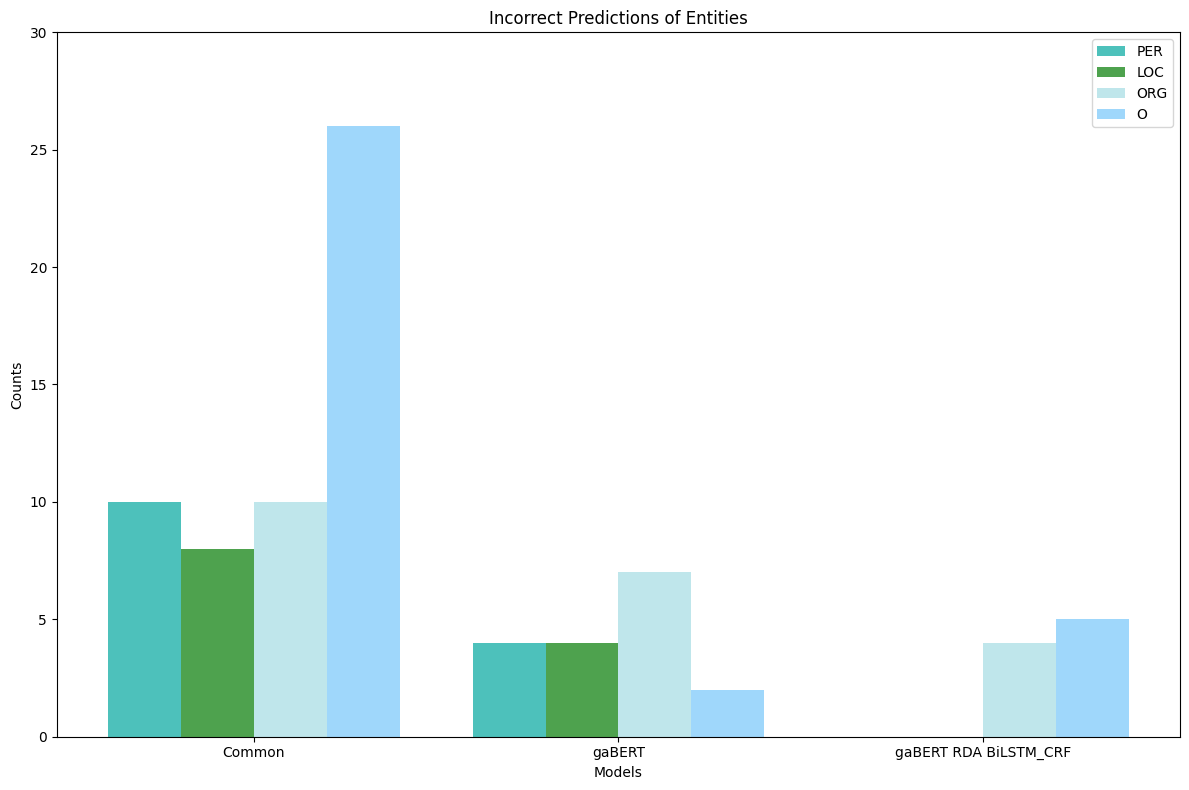

In [129]:
import numpy as np
import matplotlib.pyplot as plt


def count_entity_tuples(dictionary):
    counts = {'PER': 0, 'LOC': 0, 'ORG': 0, 'O': 0}
    for key in dictionary:
        for _, tag, _ in dictionary[key]:
            if tag.startswith('B-PER') or tag.startswith('I-PER'):
                counts['PER'] += 1
            elif tag.startswith('B-LOC') or tag.startswith('I-LOC'):
                counts['LOC'] += 1
            elif tag.startswith('B-ORG') or tag.startswith('I-ORG'):
                counts['ORG'] += 1
            elif tag.startswith('O'):
                counts['O'] += 1
    return counts

# Initialize counts dictionary
dict_counts = []

# Count tuples for PER, LOC, and ORG in each dictionary
for dictionary in [common_pairs, only_gabert, only_gabert_crf]:
    counts = count_entity_tuples(dictionary)
    dict_counts.append(counts)

print(dict_counts)
# Extract counts for plotting
categories = list(dict_counts[0].keys())
counts_dict1 = [counts['PER'] for counts in dict_counts]
counts_dict2 = [counts['LOC'] for counts in dict_counts]
counts_dict3 = [counts['ORG'] for counts in dict_counts]
counts_dict4 = [counts['O'] for counts in dict_counts]

bar_width = 0.2
index = np.arange(len(dict_counts))
opacity = 0.8

plt.figure(figsize=(12, 8))
plt.bar(index, counts_dict1, bar_width, alpha=opacity, color='lightseagreen', label='PER')
plt.bar(index + bar_width, counts_dict2, bar_width, alpha=opacity, color='forestgreen', label='LOC')
plt.bar(index + 2 * bar_width, counts_dict3, bar_width, alpha=opacity, color='powderblue', label='ORG')
plt.bar(index + 3 * bar_width, counts_dict4, bar_width, alpha=opacity, color='lightskyblue', label='O')

plt.xlabel('Models')
plt.ylabel('Counts')
plt.title('Incorrect Predictions of Entities')
plt.xticks(index + 1.5 * bar_width, ['Common', 'gaBERT', 'gaBERT RDA BiLSTM_CRF'])  # Adjusting xticks position
plt.yticks(np.arange(0, max(max(counts_dict1), max(counts_dict2), max(counts_dict3), max(counts_dict4)) + 5, 5))
plt.legend()
plt.savefig('gaBERT_gaBERT_RDA_BiLSTM.png')
plt.tight_layout()
plt.show()

In [111]:
print(dict_counts)

[{'PER': 10, 'LOC': 8, 'ORG': 10, 'O': 26}, {'PER': 4, 'LOC': 4, 'ORG': 7, 'O': 2}, {'PER': 0, 'LOC': 0, 'ORG': 4, 'O': 5}]


In [112]:
# Now looking at where the models thought a non-entity was an entity

In [113]:
# PER
per_incorrect_index =  {}
for k, v in only_gabert.items():
  for vals in v:
    word, gold, pred = vals
    if 'PER' in pred and gold == 'O':
      per_incorrect_index[k] = [vals[0] for vals in v if 'PER' in vals[2]]
      print(k, word)

for keys, values in per_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-3:i+3])
        i += 1
      else:
        i += 1

In [114]:
# LOC
loc_incorrect_index =  {}
for k, v in only_gabert.items():
  for vals in v:
    word, gold, pred = vals
    if 'LOC' in pred and gold == 'O':
      loc_incorrect_index[k] = [vals[0] for vals in v if 'LOC' in vals[2]]
      print(k, word)

for keys, values in loc_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-3:i+3])
        i += 1
      else:
        i += 1

111 lear
[('áiteanna', 'O', 'O'), ('eile', 'O', 'O'), ('thar', 'O', 'O'), ('lear', 'O', 'B-LOC'), ('a', 'O', 'O'), ('fheiceáil', 'O', 'O')]


In [115]:
# ORG
org_incorrect_index =  {}
for k, v in only_gabert.items():
  for vals in v:
    word, gold, pred = vals
    if 'ORG' in pred and gold == 'O':
      org_incorrect_index[k] = [vals[0] for vals in v if 'ORG' in vals[2]]
      print(k, word)

for keys, values in org_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-3:i+3])
        i += 1
      else:
        i += 1

9 Lig
[(':', 'O', 'O'), ('Thug', 'O', 'O'), ('foilsiú', 'O', 'O'), ('Lig', 'O', 'B-ORG'), ('Sinn', 'O', 'O'), ('i', 'O', 'O')]


In [116]:
# PER
per_incorrect_index =  {}
for k, v in only_gabert_crf.items():
  for vals in v:
    word, gold, pred = vals
    if 'PER' in pred and gold == 'O':
      per_incorrect_index[k] = [vals[0] for vals in v if 'PER' in vals[2]]
      print(k, word)

for keys, values in per_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-3:i+3])
        i += 1
      else:
        i += 1

53 Ceannaire
[('##ream', 'O', 'O'), ('ach', 'O', 'O'), ('an', 'O', 'O'), ('Ceannaire', 'O', 'B-PER'), (',', 'O', 'O'), ('Mary', 'B-PER', 'B-PER')]


In [117]:
# ORG
org_incorrect_index =  {}
for k, v in only_gabert_crf.items():
  for vals in v:
    word, gold, pred = vals
    if 'ORG' in pred and gold == 'O':
      org_incorrect_index[k] = [vals[0] for vals in v if 'ORG' in vals[2]]
      print(k, word)

for keys, values in org_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence)
        i += 1
      else:
        i += 1

In [118]:
# LOC
loc_incorrect_index =  {}
for k, v in only_gabert_crf.items():
  for vals in v:
    word, gold, pred = vals
    if 'LOC' in pred and gold == 'O':
      per_incorrect_index[k] = [vals[0] for vals in v if 'LOC' in vals[2]]
      print(k, word)

for keys, values in loc_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-3:i+3])
        i += 1
      else:
        i += 1

37 ##mann
52 Gaeltachta
121 -
121 Teorann


In [119]:
# PER
per_incorrect_index =  {}
for k, v in common_pairs.items():
  for vals in v:
    word, gold, pred = vals
    if 'PER' in pred and gold == 'O':
      per_incorrect_index[k] = [vals[0] for vals in v if 'PER' in vals[2]]
      print(k, word)

for keys, values in per_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-3:i+3])
        i += 1
      else:
        i += 1

7 Bean
46 Chap
46 ##aillí
46 ##n
64 Aire
[('a', 'O', 'O'), ('máthar', 'O', 'O'), (',', 'O', 'O'), ('Bean', 'O', 'B-PER'), ('Uí', 'B-PER', 'I-PER'), ('E', 'I-PER', 'I-PER')]
[('máthar', 'O', 'O'), (',', 'O', 'O'), ('Bean', 'O', 'B-PER'), ('Uí', 'B-PER', 'I-PER'), ('E', 'I-PER', 'I-PER'), ('##idhin', 'I-PER', 'I-PER')]
[('##p', 'O', 'O'), (',', 'O', 'O'), ('a', 'O', 'O'), ('Chap', 'O', 'B-PER'), ('##aillí', 'O', 'B-PER'), ('##n', 'O', 'B-PER')]
[(',', 'O', 'O'), ('a', 'O', 'O'), ('Chap', 'O', 'B-PER'), ('##aillí', 'O', 'B-PER'), ('##n', 'O', 'B-PER'), ("'", 'O', 'O')]
[('a', 'O', 'O'), ('Chap', 'O', 'B-PER'), ('##aillí', 'O', 'B-PER'), ('##n', 'O', 'B-PER'), ("'", 'O', 'O'), ('agus', 'O', 'O')]
[('Ar', 'O', 'O'), ('son', 'O', 'O'), ('an', 'O', 'O'), ('Aire', 'B-PER', 'B-PER'), ('Dlí', 'I-PER', 'I-PER'), ('agus', 'I-PER', 'I-PER')]
[('isteach', 'O', 'O'), ('chuig', 'O', 'O'), ('an', 'O', 'O'), ('Aire', 'O', 'B-PER'), ('inniu', 'O', 'O'), ('.', 'O', 'O')]


In [121]:
# ORG
org_incorrect_index =  {}
for k, v in common_pairs.items():
  for vals in v:
    word, gold, pred = vals
    if 'ORG' in pred and gold == 'O':
      org_incorrect_index[k] = [vals[0] for vals in v if 'ORG' in vals[2]]
      print(k, word)

for keys, values in org_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-3:i+3])
        i += 1
      else:
        i += 1

20 gCoimisiún
20 Choimisiún
25 Bhinse
25 Fios
25 ##raithe
130 Seachtain
130 na
130 Gaeilge
134 L
134 ##IFE
[('cuí', 'O', 'O'), ('leis', 'O', 'O'), ('an', 'O', 'O'), ('gCoimisiún', 'O', 'B-ORG'), ('agus', 'O', 'O'), ('féadfar', 'O', 'O')]
[('nach', 'O', 'O'), ('comhaltaí', 'O', 'O'), ('den', 'O', 'O'), ('Choimisiún', 'O', 'B-ORG'), ('a', 'O', 'O'), ('áireamh', 'O', 'O')]
[('os', 'O', 'O'), ('comhair', 'O', 'O'), ('an', 'O', 'O'), ('Bhinse', 'O', 'B-ORG'), ('Fios', 'O', 'I-ORG'), ('##raithe', 'O', 'I-ORG')]
[('comhair', 'O', 'O'), ('an', 'O', 'O'), ('Bhinse', 'O', 'B-ORG'), ('Fios', 'O', 'I-ORG'), ('##raithe', 'O', 'I-ORG'), ('an', 'O', 'O')]
[('an', 'O', 'O'), ('Bhinse', 'O', 'B-ORG'), ('Fios', 'O', 'I-ORG'), ('##raithe', 'O', 'I-ORG'), ('an', 'O', 'O'), ('lá', 'O', 'O')]
[('i', 'O', 'O'), ('gcomhar', 'O', 'O'), ('le', 'O', 'O'), ('Seachtain', 'O', 'B-ORG'), ('na', 'O', 'I-ORG'), ('Gaeilge', 'O', 'I-ORG')]
[('fáil', 'O', 'O'), ('do', 'O', 'O'), ('Chonradh', 'B-ORG', 'B-ORG'), ('na', 'I-

In [122]:
# LOC
loc_incorrect_index =  {}
for k, v in common_pairs.items():
  for vals in v:
    word, gold, pred = vals
    if 'LOC' in pred and gold == 'O':
      loc_incorrect_index[k] = [vals[0] for vals in v if 'LOC' in vals[2]]
      print(k, word)

for keys, values in loc_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-3:i+3])
        i += 1
      else:
        i += 1

54 Bealach
54 a
54 '
54 Cho
54 ##in
54 Ghla
54 ##is
103 chathair
103 na
116 Leithinis
137 Gaeltachta
[]
[]
[('thart', 'O', 'O'), ('le', 'O', 'O'), ('Eilean', 'B-LOC', 'B-LOC'), ('a', 'I-LOC', 'I-LOC'), ("'", 'I-LOC', 'I-LOC'), ('Bhe', 'I-LOC', 'I-LOC')]
[('##ra', 'I-LOC', 'I-LOC'), ('an', 'O', 'O'), ('áit', 'O', 'O'), ('a', 'O', 'O'), ('raibh', 'O', 'O'), ('an', 'O', 'O')]
[('Tá', 'O', 'O'), ('Bealach', 'O', 'B-LOC'), ('a', 'O', 'I-LOC'), ("'", 'O', 'I-LOC'), ('Cho', 'O', 'I-LOC'), ('##in', 'O', 'I-LOC')]
[('le', 'O', 'O'), ('Eilean', 'B-LOC', 'B-LOC'), ('a', 'I-LOC', 'I-LOC'), ("'", 'I-LOC', 'I-LOC'), ('Bhe', 'I-LOC', 'I-LOC'), ('##ala', 'I-LOC', 'I-LOC')]
[('Bealach', 'O', 'B-LOC'), ('a', 'O', 'I-LOC'), ("'", 'O', 'I-LOC'), ('Cho', 'O', 'I-LOC'), ('##in', 'O', 'I-LOC'), ('Ghla', 'O', 'I-LOC')]
[('a', 'O', 'I-LOC'), ("'", 'O', 'I-LOC'), ('Cho', 'O', 'I-LOC'), ('##in', 'O', 'I-LOC'), ('Ghla', 'O', 'I-LOC'), ('##is', 'O', 'I-LOC')]
[("'", 'O', 'I-LOC'), ('Cho', 'O', 'I-LOC'), ('##in', '

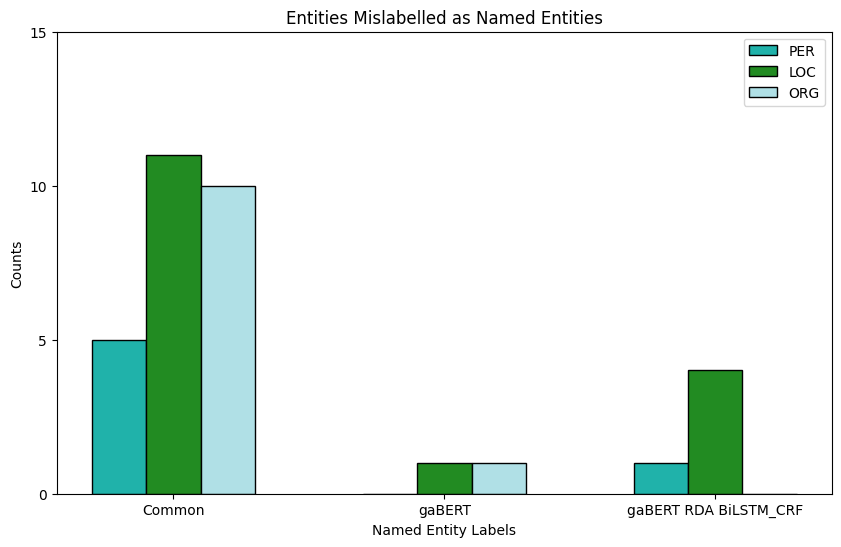

In [128]:
def count_entity_tuples(dictionary):
    counts = {'PER': 0, 'LOC': 0, 'ORG': 0}
    for key in dictionary:
        for _, gold, tag in dictionary[key]:
            if gold == 'O' and (tag.startswith('B-PER') or tag.startswith('I-PER')):
                counts['PER'] += 1
            elif gold == 'O' and (tag.startswith('B-LOC') or tag.startswith('I-LOC')):
                counts['LOC'] += 1
            elif gold == 'O' and (tag.startswith('B-ORG') or tag.startswith('I-ORG')):
                counts['ORG'] += 1
    return counts

# Initialize counts dictionary
dict_counts = []

# Count tuples for PER, LOC, and ORG in each dictionary
for dictionary in [common_pairs, only_gabert, only_gabert_crf]:
    counts = count_entity_tuples(dictionary)
    dict_counts.append(counts)

# Extract counts for plotting
categories = list(dict_counts[0].keys())
counts_dict1 = [counts['PER'] for counts in dict_counts]
counts_dict2 = [counts['LOC'] for counts in dict_counts]
counts_dict3 = [counts['ORG'] for counts in dict_counts]

# Plotting
bar_width = 0.2
index = range(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(index, counts_dict1, width=bar_width, color='lightseagreen', label='PER', edgecolor='black')
plt.bar([i + bar_width for i in index], counts_dict2, width=bar_width, color='forestgreen', label='LOC', edgecolor='black')
plt.bar([i + 2 * bar_width for i in index], counts_dict3, width=bar_width, color='powderblue', label='ORG', edgecolor='black')

plt.xlabel('Named Entity Labels')
plt.ylabel('Counts')
plt.title('Entities Mislabelled as Named Entities')
plt.xticks([i + bar_width for i in index], ['Common', 'gaBERT', 'gaBERT RDA BiLSTM_CRF'])
plt.yticks(np.arange(0, max(max(counts_dict1), max(counts_dict2), max(counts_dict3)) + 5, 5))
plt.legend()
plt.show()

In [124]:
#predicted PER when its not
# FALSE POSITIVES

In [125]:
print(dict_counts)

[{'PER': 5, 'LOC': 11, 'ORG': 10}, {'PER': 0, 'LOC': 1, 'ORG': 1}, {'PER': 1, 'LOC': 4, 'ORG': 0}]


In [126]:
correct_only_gabert = {key: value for key, value in correct_gabert.items() if key not in correct_gabert_crf}

print(correct_only_gabert)

correct_only_gabert_crf = {key: value for key, value in correct_gabert_crf.items() if key not in correct_gabert}

print(correct_only_gabert_crf)

{}
{}


In [127]:
# PER
per_incorrect_index =  {}
for k, v in only_gabert_crf.items():
  for vals in v:
    word, gold, pred = vals
    if 'PER' in gold:
      per_incorrect_index[k] = [vals[0] for vals in v if 'PER' in vals[1]]
      print(k, word)

for keys, values in per_incorrect_index.items():
  for v in values:
    #print(v)
    i = 0
    sentence = gabert_crf[keys]
    #print(sentence)
    while i < len(sentence):
      #print(sentence)
      word, gold, pred = sentence[i]
      if word == v:
        print(sentence[i-2:i+2])
        i += 1
      else:
        i += 1